<a href="https://colab.research.google.com/github/Kartikey0412/Names_RNN/blob/master/mnist_cnn_kg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

5


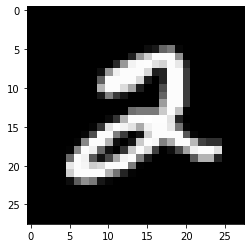

In [ ]:
plt.imshow(x_train[5], cmap='gray', interpolation='none')
print(y_train[0])

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
print("Training:",x_train.shape)
print("testing:", x_test.shape)

Training: (60000, 28, 28, 1)
testing: (10000, 28, 28, 1)


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)
print(y_train[0])

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=32, epochs=20,
          verbose=2,
          validation_data=(x_test, y_test), callbacks=[annealer, es])

Epoch 1/20
1875/1875 - 7s - loss: 0.1796 - accuracy: 0.9470 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 2/20
1875/1875 - 6s - loss: 0.0845 - accuracy: 0.9767 - val_loss: 0.0475 - val_accuracy: 0.9879
Epoch 3/20
1875/1875 - 6s - loss: 0.0667 - accuracy: 0.9822 - val_loss: 0.0318 - val_accuracy: 0.9912
Epoch 4/20
1875/1875 - 6s - loss: 0.0570 - accuracy: 0.9844 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 5/20
1875/1875 - 6s - loss: 0.0483 - accuracy: 0.9867 - val_loss: 0.0266 - val_accuracy: 0.9923
Epoch 6/20
1875/1875 - 6s - loss: 0.0398 - accuracy: 0.9887 - val_loss: 0.0253 - val_accuracy: 0.9923
Epoch 7/20
1875/1875 - 6s - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 8/20
1875/1875 - 6s - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.0222 - val_accuracy: 0.9939
Epoch 9/20
1875/1875 - 6s - loss: 0.0282 - accuracy: 0.9924 - val_loss: 0.0223 - val_accuracy: 0.9943
Epoch 10/20
1875/1875 - 6s - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0243 - 

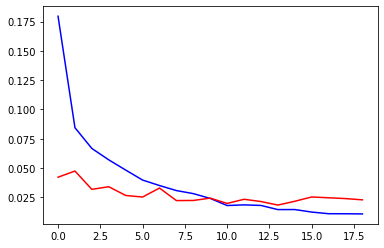

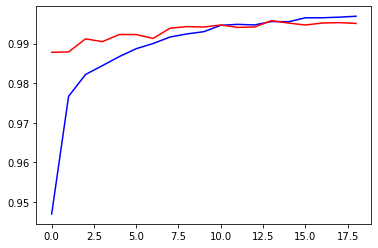

In [ ]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.show()